In [1]:
import numpy as np
import mne

In [2]:
# import numpy as np
# import mne

# # List the paths of the text files you want to combine
# txt_files = ['OpenBCI-RAW-2023-06-02_11-23-20.txt', 'OpenBCI-RAW-2023-06-12_11-56-13.txt']

# # Create an empty list to store the data from each file
# data_list = []

# # Loop over each text file
# for file in txt_files:
#     # Load the text file
#     data = np.genfromtxt(file, delimiter=',', skip_header=5, invalid_raise=False)
    
#     # Filter out lines with inconsistent column counts
#     data = data[~np.isnan(data[:, 0])]
    
#     # Extract the relevant data columns
#     data = data[:, 1:9]
    
#     # Append the data to the list
#     data_list.append(data)

# # Combine the data from all files into a single array
# combined_data = np.concatenate(data_list, axis=0)

# # Create the info structure
# sfreq = 250  # Replace with the actual sampling rate of your data
# n_channels = combined_data.shape[1]  # Number of channels in the data
# ch_names = [' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7']
# ch_types = 'eeg'
# info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# # Create the RawArray object
# raw = mne.io.RawArray(combined_data.T, info)

# # Save as FIF file
# raw.save('output_file_combined.fif', overwrite=True)

In [3]:
# Load the text file
# data = np.genfromtxt('OpenBCI-RAW-2023-06-02_11-23-20.txt', delimiter=',', skip_header=5, filling_values=np.nan, usecols=range(1, 26))
data = np.genfromtxt('OpenBCI-RAW-2023-07-21_14-08-14.txt', delimiter=',', skip_header=5, invalid_raise=False)

# Filter out lines with inconsistent column counts
data = data[~np.isnan(data[:, 0])]

# Extract the relevant data columns
data = data[:, 1:9]
# Create the info structure
sfreq = 250  # Replace with the actual sampling rate of your data
n_channels = data.shape[1]  # Number of channels in the data
ch_names = [' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7']
ch_types = 'eeg'
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create the RawArray object
raw = mne.io.RawArray(data.T, info)

# Save as FIF file
raw.save('output_file2.fif', overwrite=True)

Creating RawArray with float64 data, n_channels=8, n_times=91421
    Range : 0 ... 91420 =      0.000 ...   365.680 secs
Ready.
Overwriting existing file.
Writing /home/paul/EEG/output_file2.fif
Closing /home/paul/EEG/output_file2.fif
[done]


/tmp/ipykernel_476/1239673165.py:21: RuntimeWarning: This filename (/home/paul/EEG/output_file2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save('output_file2.fif', overwrite=True)


Using matplotlib as 2D backend.


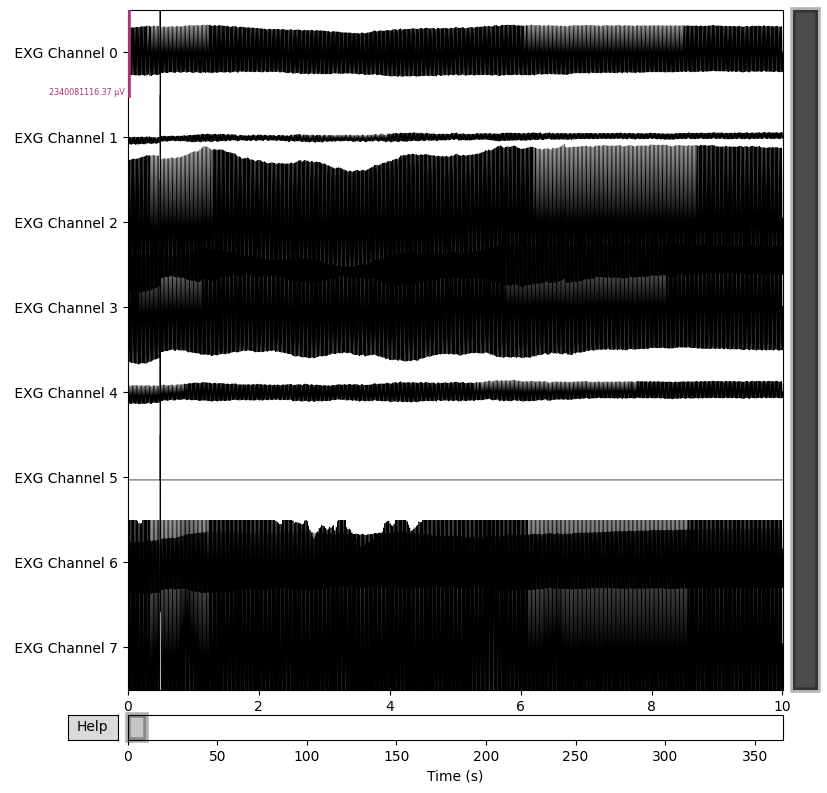

In [4]:
import matplotlib.pyplot as plt
raw.plot(n_channels=8, scalings='auto')
plt.show()

In [5]:
raw = mne.io.read_raw_fif('output_file2.fif')
# Print the information
print(raw)
raw.info

Opening raw data file output_file2.fif...
Isotrak not found
    Range : 0 ... 91420 =      0.000 ...   365.680 secs
Ready.
<Raw | output_file2.fif, 8 x 91421 (365.7 s), ~14 kB, data not loaded>


/tmp/ipykernel_476/3262808475.py:1: RuntimeWarning: This filename (output_file2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('output_file2.fif')


<Info | 9 non-empty values
 bads: []
 ch_names: EXG Channel 0, EXG Channel 1, EXG Channel 2, EXG Channel 3, EXG ...
 chs: 8 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

In [6]:
raw = mne.io.read_raw_fif('output_file2.fif', preload=True)

# Define filter parameters
low_freq = 1  # Low cutoff frequency in Hz
high_freq = 30  # High cutoff frequency in Hz
picks = ch_names 
# Apply high-pass filter
raw.filter(l_freq=low_freq, h_freq=high_freq,picks=picks)

# Apply low-pass filter
# raw.filter(l_freq=None, h_freq=high_freq,picks=picks)

# Save the filtered data to a new FIF file
filtered_file = 'filtered_file3.fif'
raw.save(filtered_file, overwrite=True)

Opening raw data file output_file2.fif...
Isotrak not found
    Range : 0 ... 91420 =      0.000 ...   365.680 secs
Ready.
Reading 0 ... 91420  =      0.000 ...   365.680 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)



/tmp/ipykernel_476/2283055031.py:1: RuntimeWarning: This filename (output_file2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('output_file2.fif', preload=True)


Overwriting existing file.
Writing /home/paul/EEG/filtered_file3.fif
Closing /home/paul/EEG/filtered_file3.fif
[done]


/tmp/ipykernel_476/2283055031.py:15: RuntimeWarning: This filename (/home/paul/EEG/filtered_file3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(filtered_file, overwrite=True)


Opening raw data file filtered_file3.fif...
Isotrak not found
    Range : 0 ... 91420 =      0.000 ...   365.680 secs
Ready.


/tmp/ipykernel_476/1435033470.py:2: RuntimeWarning: This filename (filtered_file3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_file3.fif')


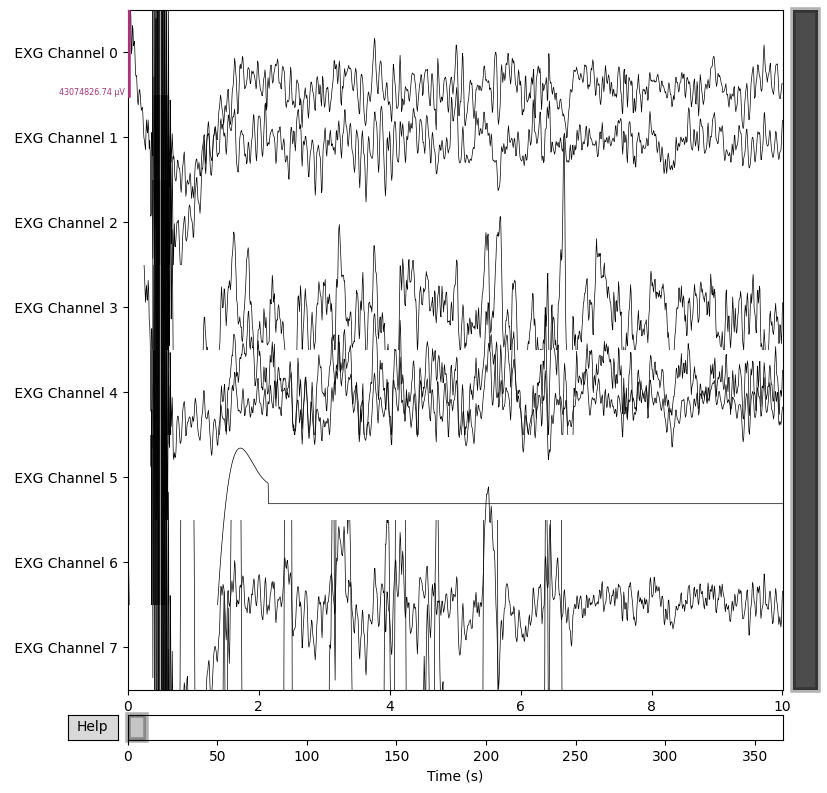

In [7]:
import matplotlib.pyplot as plt
raw = mne.io.read_raw_fif('filtered_file3.fif')
raw.plot(n_channels=8, scalings='auto')
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/home/paul/.local/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


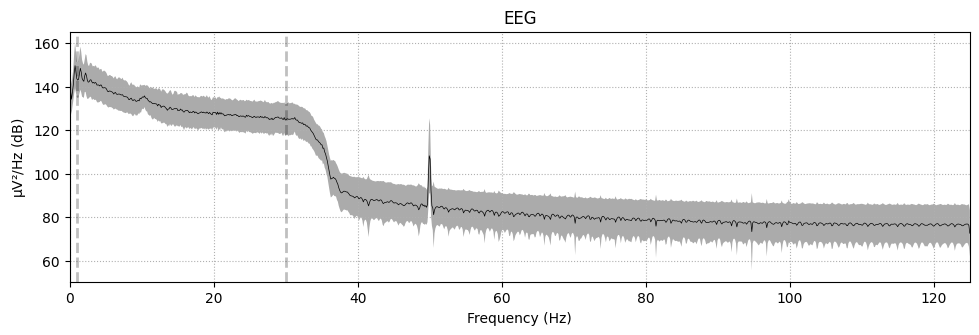

In [8]:
ch_names = [' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7'] 
picks = ch_names
raw.plot_psd(average=True,picks=picks)
plt.show()

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components


/tmp/ipykernel_476/2721513996.py:7: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage)


Fitting ICA took 0.4s.


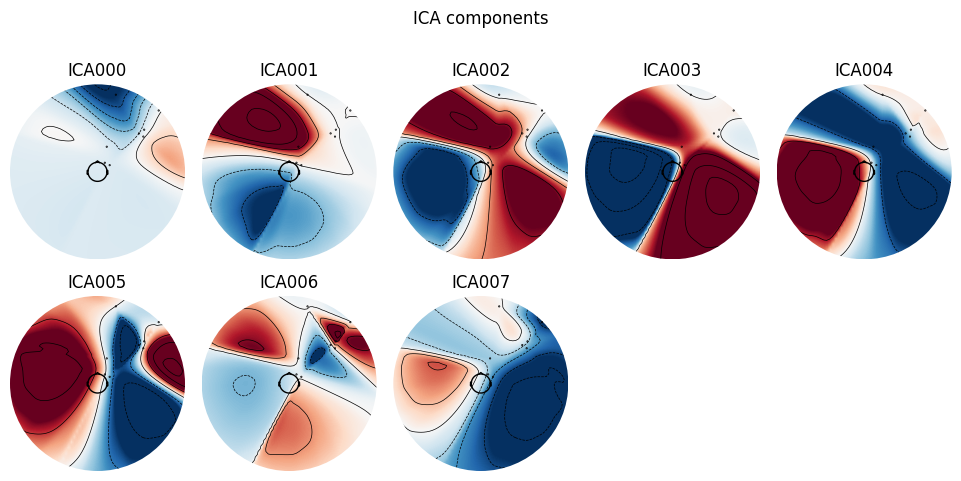

In [9]:
ch_names = raw.info['ch_names']  # Get channel names
ch_pos = np.random.rand(len(ch_names), 3)  # Replace with actual sensor positions

sensor_locs = {ch_name: pos for ch_name, pos in zip(ch_names, ch_pos)}

montage = mne.channels.make_dig_montage(ch_pos=sensor_locs)
raw.set_montage(montage)
ica = mne.preprocessing.ICA(n_components=8, random_state=97, max_iter=800)
ica.fit(inst=raw)
ica.plot_components()
plt.show()

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated


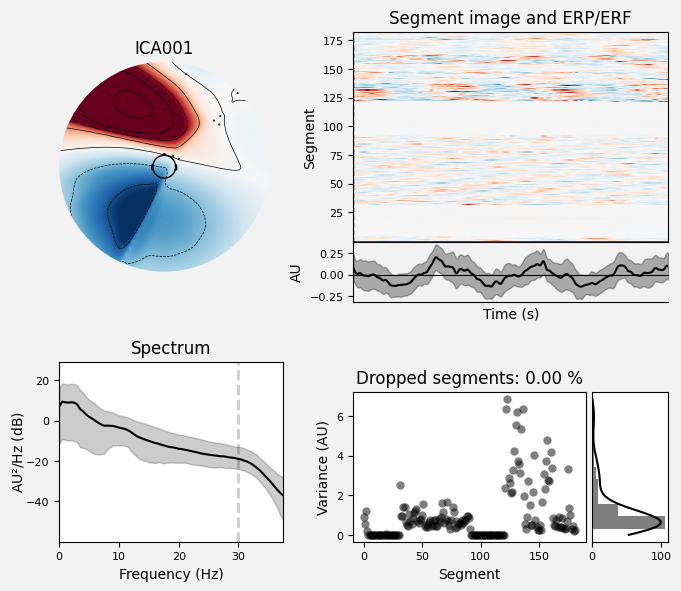

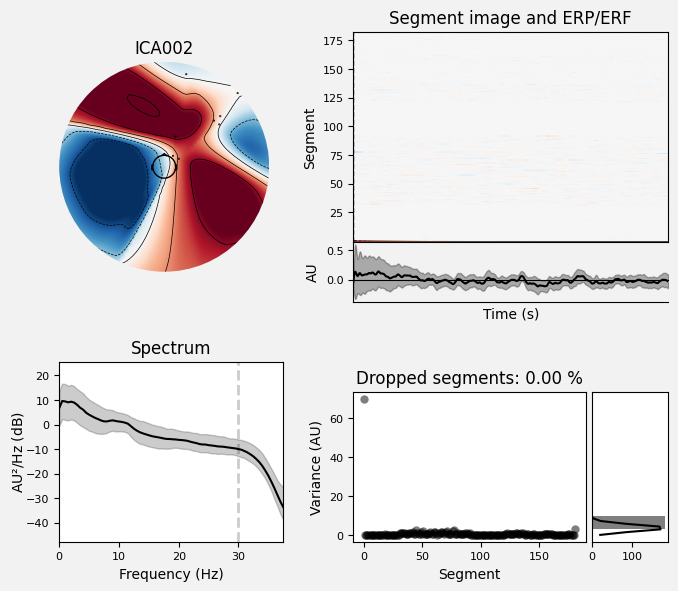

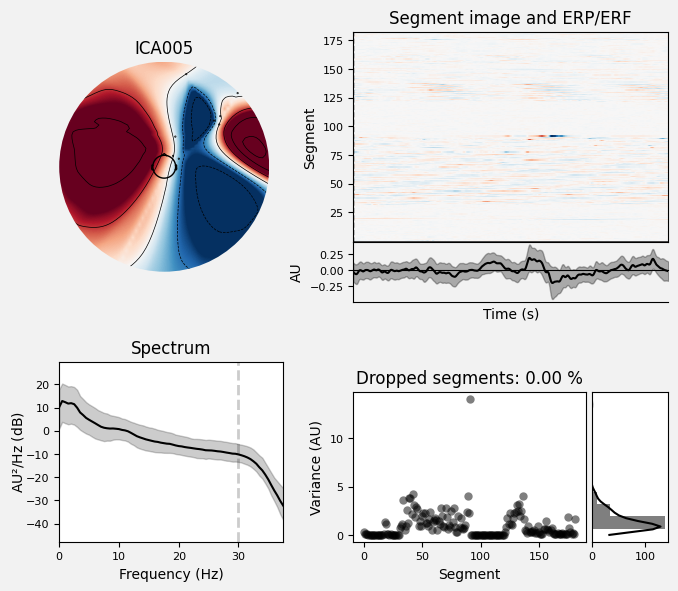

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [10]:
ica = mne.preprocessing.ICA(n_components=8, random_state=97, max_iter=800)
ica.fit(inst=raw)
ica.plot_properties(raw,picks=[1,2,5])

In [11]:
# event_start_time_right1 = 10  
# event_end_time_right1 = 130

# event_start_time_left1 = 190
# event_end_time_left1 = 310

# event_start_time_right2 = 370
# event_end_time_right2 = 490

# event_start_time_left2 = 550
# event_end_time_left2 = 670

# event_start_time_right3 = 670  
# event_end_time_right3 = 790 

# event_start_time_left3 = 850
# event_end_time_left3 = 970

# event_start_time_right4 = 1030 
# event_end_time_right4 = 1150

# event_start_time_left4 = 1210
# event_end_time_left4 = 1330


# # Create annotations for each segment
# annotation_right1 = mne.Annotations(onset=event_start_time_right1, duration=event_end_time_right1 - event_start_time_right1,
#                                    description='right')

# annotation_left1 = mne.Annotations(onset=event_start_time_left1, duration=event_end_time_left1 - event_start_time_left1,
#                                   description='left')


# annotation_right2 = mne.Annotations(onset=event_start_time_right2, duration=event_end_time_right2 - event_start_time_right2,
#                                    description='right')

# annotation_left2 = mne.Annotations(onset=event_start_time_left2, duration=event_end_time_left2 - event_start_time_left2,
#                                   description='left')


# annotation_right3 = mne.Annotations(onset=event_start_time_right3, duration=event_end_time_right3 - event_start_time_right3,
#                                    description='right')

# annotation_left3 = mne.Annotations(onset=event_start_time_left3, duration=event_end_time_left3 - event_start_time_left3,
#                                   description='left')

# annotation_right4 = mne.Annotations(onset=event_start_time_right4, duration=event_end_time_right4 - event_start_time_right4,
#                                    description='right')

# annotation_left4= mne.Annotations(onset=event_start_time_left4, duration=event_end_time_left4 - event_start_time_left4,
#                                   description='left')

# # Concatenate the annotations to create a single annotation object
# annotations = annotation_right1 + annotation_left1 + annotation_right2 +  annotation_left2 + annotation_right3 + annotation_left3 + annotation_right4 + annotation_left4

# # Set the annotations for the raw data
# raw.set_annotations(annotations)

# # Define the event IDs as a dictionary, mapping 'right' to 1 and 'left' to 2
# event_id = {'right': 1, 'left': 2}

# # Generate events based on the combined annotations
# events, _ = mne.events_from_annotations(raw, event_id=event_id, chunk_duration=1.0)

# # Print the generated events and verify they are unique
# # print("Generated Events:")
# # for event in events:
# #     print(f"Sample: {event[0]}, Event ID: {event[2]}")
# print(events)

# print(event_id)

In [12]:
event_start_time_right1 = 10  
event_end_time_right1 = 130  
event_start_time_left1 = 190
event_end_time_left1 = 310
event_start_time_right2 = 370
event_end_time_right2 = 490
event_start_time_left2 = 550
event_end_time_left2 = 670



# Create annotations for each segment
annotation_right1 = mne.Annotations(onset=event_start_time_right1, duration=event_end_time_right1 - event_start_time_right1,
                                   description='right')
annotation_left1 = mne.Annotations(onset=event_start_time_left1, duration=event_end_time_left1 - event_start_time_left1,
                                  description='left')

annotation_right2 = mne.Annotations(onset=event_start_time_right2, duration=event_end_time_right2 - event_start_time_right2,
                                   description='right')
annotation_left2 = mne.Annotations(onset=event_start_time_left2, duration=event_end_time_left2 - event_start_time_left2,
                                  description='left')



# Concatenate the annotations to create a single annotation object
annotations = annotation_right1 + annotation_left1 + annotation_right2 + annotation_left2 

# Set the annotations for the raw data
raw.set_annotations(annotations)

# Define the event IDs as a dictionary, mapping 'right' to 1 and 'left' to 2
event_id = {'right': 1, 'left': 2}

# Generate events based on the combined annotations
events, _ = mne.events_from_annotations(raw, event_id=event_id, chunk_duration=1.0)

# Print the generated events and verify they are unique
# print("Generated Events:")
# for event in events:
#     print(f"Sample: {event[0]}, Event ID: {event[2]}")
print(events)

print(event_id)

Used Annotations descriptions: ['left', 'right']
[[ 2500     0     1]
 [ 2750     0     1]
 [ 3000     0     1]
 [ 3250     0     1]
 [ 3500     0     1]
 [ 3750     0     1]
 [ 4000     0     1]
 [ 4250     0     1]
 [ 4500     0     1]
 [ 4750     0     1]
 [ 5000     0     1]
 [ 5250     0     1]
 [ 5500     0     1]
 [ 5750     0     1]
 [ 6000     0     1]
 [ 6250     0     1]
 [ 6500     0     1]
 [ 6750     0     1]
 [ 7000     0     1]
 [ 7250     0     1]
 [ 7500     0     1]
 [ 7750     0     1]
 [ 8000     0     1]
 [ 8250     0     1]
 [ 8500     0     1]
 [ 8750     0     1]
 [ 9000     0     1]
 [ 9250     0     1]
 [ 9500     0     1]
 [ 9750     0     1]
 [10000     0     1]
 [10250     0     1]
 [10500     0     1]
 [10750     0     1]
 [11000     0     1]
 [11250     0     1]
 [11500     0     1]
 [11750     0     1]
 [12000     0     1]
 [12250     0     1]
 [12500     0     1]
 [12750     0     1]
 [13000     0     1]
 [13250     0     1]
 [13500     0     1]
 [1375

/tmp/ipykernel_476/2186463522.py:29: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  raw.set_annotations(annotations)


Opening raw data file filtered_file3.fif...
Isotrak not found
    Range : 0 ... 91420 =      0.000 ...   365.680 secs
Ready.
Not setting metadata
240 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 240 events and 2626 original time points ...
0 bad epochs dropped
...........
<Epochs |  240 events (all good), -0.5 – 10 s, baseline -0.5 – 0 s, ~38.5 MB, data loaded,
 'right': 120
 'left': 120>
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_476/2680177114.py:4: RuntimeWarning: This filename (filtered_file3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_file3.fif')


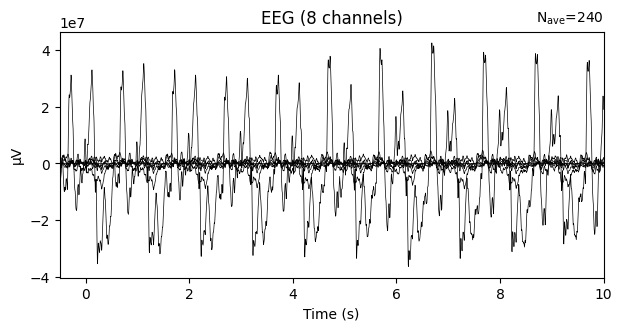

In [13]:
tmin = -0.5
tmax = 10
# 读取fif文件,创建raw对象
raw = mne.io.read_raw_fif('filtered_file3.fif')
# 读取包含event的fif文件，创建event对


# raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bads + 2 more
# picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, eog=True,
#                        exclude='bads')
picks = ch_names
# 读取Epoch数据
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=(None, 0), preload=True)
# epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=(None, 0), preload=True, event_repeated='merge')

print('...........')
print(epochs)
evoked = epochs.average()

evoked.plot(time_unit='s')
plt.show()

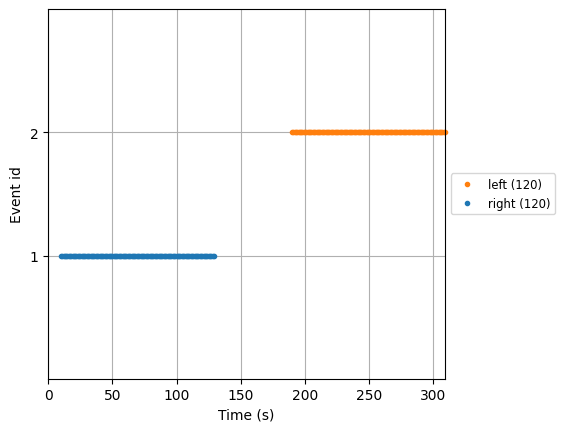

In [14]:
sfreq = 250
mne.viz.plot_events(events=events, event_id=event_id,
                    sfreq=sfreq)
stage_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [15]:
X = epochs.get_data()

# Get the target labels `y` from the event IDs in the epochs
y = epochs.events[:, -1]

# Print the shapes of `X` and `y`
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (240, 8, 2626)
Shape of y: (240,)


/home/paul/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch [1/30], Train Loss: 1.7070, Train Accuracy: 0.0000, Test Loss: 1.6702, Test Accuracy: 0.0000
Epoch [2/30], Train Loss: 1.6523, Train Accuracy: 0.0000, Test Loss: 1.6252, Test Accuracy: 0.0000
Epoch [3/30], Train Loss: 1.6001, Train Accuracy: 0.0357, Test Loss: 1.5799, Test Accuracy: 0.2361
Epoch [4/30], Train Loss: 1.5411, Train Accuracy: 0.2679, Test Loss: 1.5318, Test Accuracy: 0.3333
Epoch [5/30], Train Loss: 1.4811, Train Accuracy: 0.4405, Test Loss: 1.4624, Test Accuracy: 0.3333
Epoch [6/30], Train Loss: 1.4137, Train Accuracy: 0.5060, Test Loss: 1.4023, Test Accuracy: 0.4861
Epoch [7/30], Train Loss: 1.3431, Train Accuracy: 0.5060, Test Loss: 1.3299, Test Accuracy: 0.4861
Epoch [8/30], Train Loss: 1.2695, Train Accuracy: 0.6845, Test Loss: 1.2401, Test Accuracy: 0.6667
Epoch [9/30], Train Loss: 1.1861, Train Accuracy: 0.8036, Test Loss: 1.1696, Test Accuracy: 0.7083
Epoch [10/30], Train Loss: 1.1049, Train Accuracy: 0.8512, Test Loss: 1.1024, Test Accuracy: 0.8056
Epoch [11

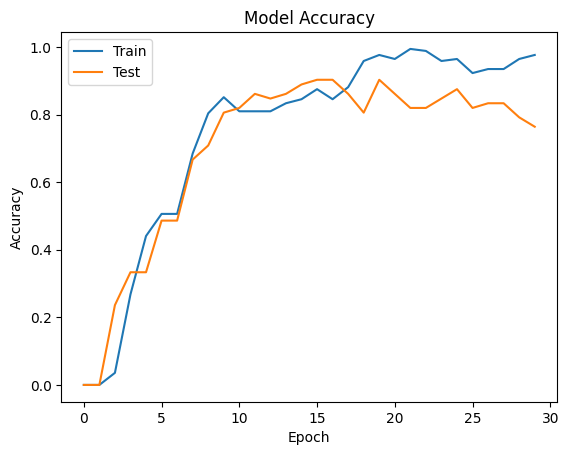

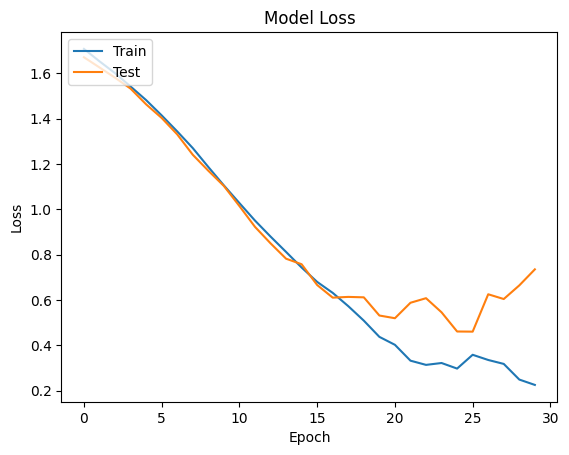

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split


# Reshape the input data
X_reshaped = np.transpose(X, (0, 2, 1))
X_reshaped = np.reshape(X_reshaped, (X_reshaped.shape[0], X_reshaped.shape[1], -1))

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a PyTorch dataset and dataloaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_reshaped, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)  # Assuming y is not one-hot encoded

# Convert labels to tensor


# Create a PyTorch dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the model
class CNNLSTM(nn.Module):
    def __init__(self):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(2626, 1313, kernel_size=1 ,bias=False)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(1313, 512, kernel_size=1)
        self.relu = nn.ReLU()
        self.conv3 = nn.Conv1d(512, 256, kernel_size=1)
        self.relu = nn.ReLU()
        self.conv4 = nn.Conv1d(256, 128, kernel_size=1)
        self.relu = nn.ReLU()
        self.conv5 = nn.Conv1d(128, 64, kernel_size=1)
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(64)
        self.lstm1 = nn.LSTM(64, 32, dropout=0.4, batch_first=True)
        self.lstm2 = nn.LSTM(32, 16, dropout=0.4, batch_first=True)
        self.fc = nn.Linear(16, 5)


    
#         self.lstm3 = nn.LSTM(64, 64, batch_first=True)
#         self.dropout_fc = nn.Dropout(0.7)
#         self.batch_norm_lstm = nn.BatchNorm1d(64)
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        
        x = self.batch_norm(x)
        
        x = x.view(x.size(0), -1, 64)
#         x = x.permute(0, 2, 1)
        
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
#         x, _ = self.lstm3(x)
        x = x[:, -1, :]
#         x = self.dropout_fc(x)
        x = self.fc(x)
        return x

# Create an instance of the model
model = CNNLSTM()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

import matplotlib.pyplot as plt

# Lists to store the training history
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()
        total_samples += inputs.size(0)
    train_loss /= total_samples
    train_accuracy = train_correct / total_samples

    # Evaluation on the test set
    model.eval()
    test_loss = 0.0
    test_correct = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()
            total_samples += inputs.size(0)
    test_loss /= total_samples
    test_accuracy = test_correct / total_samples

    # Store the training history
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_acc_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Save the trained model
torch.save(model.state_dict(), 'model.pth')

# Plot the training history
plt.plot(train_acc_history)
plt.plot(test_acc_history)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(train_loss_history)
plt.plot(test_loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
from torchview import draw_graph
import torchvision
model_graph = draw_graph(CNNLSTM(), input_size=(240, 8, 2626), save_graph=True, filename="cnn_lstm_model")
model_graph.visual_graph

ModuleNotFoundError: No module named 'graphviz'

In [156]:
# from keras.models import Sequential
# from keras import layers
# import numpy as np
# from tensorflow.keras.utils import to_categorical

# # Reshape the input data
# X_reshaped = np.transpose(X, (0, 2, 1))
# X_reshaped = np.reshape(X_reshaped, (X_reshaped.shape[0], X_reshaped.shape[1], -1))
# y_encoded = to_categorical(y, num_classes=5)

# # Define the model
# model = Sequential()
# model.add(layers.Conv1D(64, 15, strides=2, input_shape=(2626, 8), use_bias=False))
# model.add(layers.ReLU())
# model.add(layers.Conv1D(64, 3))
# model.add(layers.Conv1D(64, 3, strides=2))
# model.add(layers.ReLU())
# model.add(layers.Conv1D(64, 3))
# model.add(layers.Conv1D(64, 3, strides=2))
# model.add(layers.BatchNormalization())
# model.add(layers.Reshape((-1, 64)))  # Reshape to (None, n_steps, n_features)
# model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
# model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
# model.add(layers.LSTM(32))
# model.add(layers.Dense(5, activation="softmax"))
# model.summary()

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

# # # Save the trained model
# model.save("model.h5")

In [157]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

# # Train the model
# history = model.fit(X_train, y_train, epochs=35, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# # Evaluate the model on the training and testing sets
# train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# # Print the accuracies
# print("Training Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

In [158]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [53]:
# Load the text file
# data = np.genfromtxt('OpenBCI-RAW-2023-06-02_11-23-20.txt', delimiter=',', skip_header=5, filling_values=np.nan, usecols=range(1, 26))
data = np.genfromtxt('OpenBCI-RAW-2023-07-20_13-50-09.txt', delimiter=',', skip_header=5, invalid_raise=False)

# Filter out lines with inconsistent column counts
data = data[~np.isnan(data[:, 0])]

# Extract the relevant data columns
data = data[:, 1:9]
# Create the info structure
sfreq = 250  # Replace with the actual sampling rate of your data
n_channels = data.shape[1]  # Number of channels in the data
ch_names = [' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7']
ch_types = 'eeg'
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create the RawArray object
raw = mne.io.RawArray(data.T, info)

# Save as FIF file
raw.save('prediction_test.fif', overwrite=True)

Creating RawArray with float64 data, n_channels=8, n_times=173479
    Range : 0 ... 173478 =      0.000 ...   693.912 secs
Ready.
Overwriting existing file.
Writing /home/paul/EEG/prediction_test.fif
Closing /home/paul/EEG/prediction_test.fif
[done]


/tmp/ipykernel_471/977094825.py:21: RuntimeWarning: This filename (/home/paul/EEG/prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save('prediction_test.fif', overwrite=True)


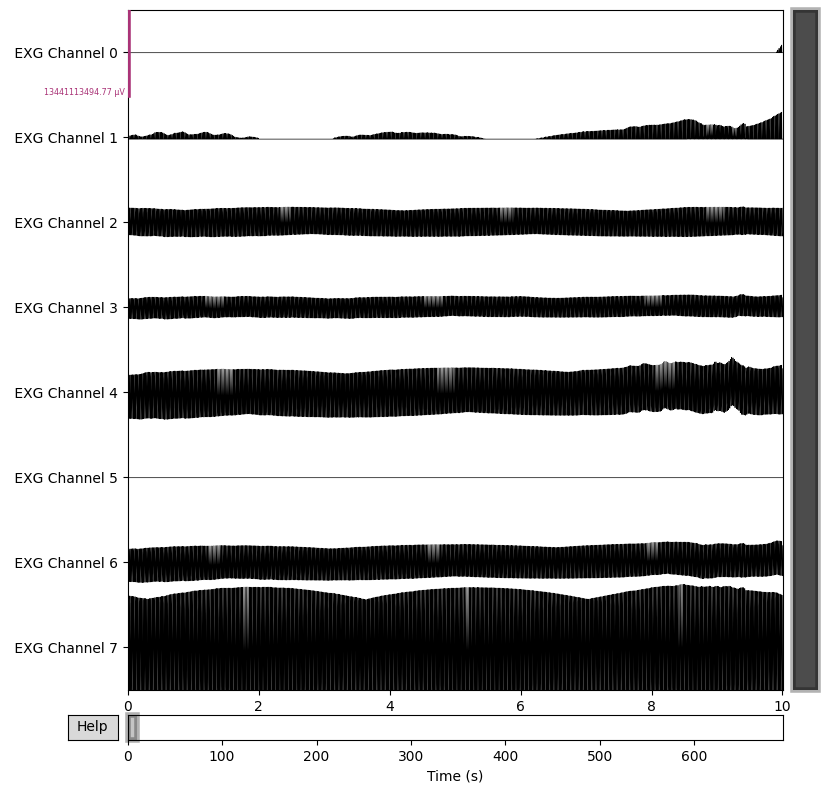

In [54]:
raw.plot(n_channels=8, scalings='auto')
plt.show()

In [55]:
raw = mne.io.read_raw_fif('prediction_test.fif')

# Print the information
print(raw)
raw.info

Opening raw data file prediction_test.fif...
Isotrak not found
    Range : 0 ... 173478 =      0.000 ...   693.912 secs
Ready.
<Raw | prediction_test.fif, 8 x 173479 (693.9 s), ~14 kB, data not loaded>


/tmp/ipykernel_471/2186525449.py:1: RuntimeWarning: This filename (prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('prediction_test.fif')


<Info | 9 non-empty values
 bads: []
 ch_names: EXG Channel 0, EXG Channel 1, EXG Channel 2, EXG Channel 3, EXG ...
 chs: 8 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

In [56]:
raw = mne.io.read_raw_fif('prediction_test.fif', preload=True)

# Define filter parameters
low_freq = 1  # Low cutoff frequency in Hz
high_freq = 30  # High cutoff frequency in Hz

picks = ch_names 
# Apply high-pass filter
raw.filter(l_freq=low_freq, h_freq=None,picks=picks)

# Apply low-pass filter
raw.filter(l_freq=None, h_freq=high_freq,picks=picks)

# Save the filtered data to a new FIF file
filtered_file = 'filtered_prediction_test.fif'
raw.save(filtered_file, overwrite=True)

Opening raw data file prediction_test.fif...
Isotrak not found
    Range : 0 ... 173478 =      0.000 ...   693.912 secs
Ready.
Reading 0 ... 173478  =      0.000 ...   693.912 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 413 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth:

/tmp/ipykernel_471/2379041146.py:1: RuntimeWarning: This filename (prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('prediction_test.fif', preload=True)
/tmp/ipykernel_471/2379041146.py:16: RuntimeWarning: This filename (/home/paul/EEG/filtered_prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(filtered_file, overwrite=True)


Opening raw data file filtered_prediction_test.fif...
Isotrak not found
    Range : 0 ... 173478 =      0.000 ...   693.912 secs
Ready.


/tmp/ipykernel_471/1901279776.py:2: RuntimeWarning: This filename (filtered_prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_prediction_test.fif')


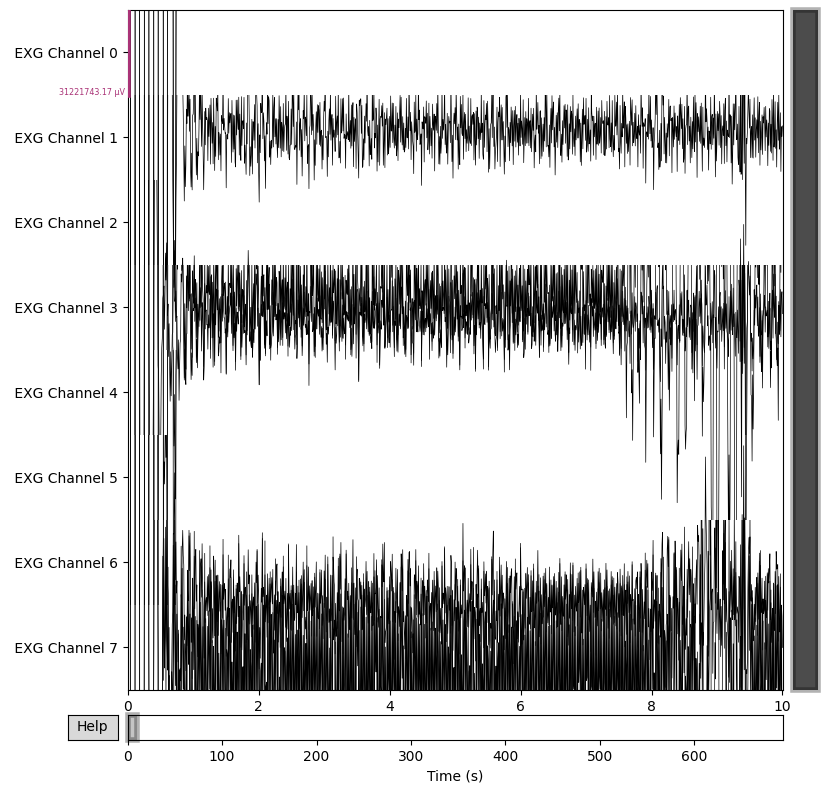

In [57]:
import matplotlib.pyplot as plt
raw = mne.io.read_raw_fif('filtered_prediction_test.fif')
raw.plot(n_channels=8, scalings='auto')
plt.show()

In [58]:
event_start_time_right1 = 10  
event_end_time_right1 = 130  
event_start_time_left1 = 190
event_end_time_left1 = 310
event_start_time_right2 = 370
event_end_time_right2 = 490
event_start_time_left2 = 550
event_end_time_left2 = 670



# Create annotations for each segment
annotation_right1 = mne.Annotations(onset=event_start_time_right1, duration=event_end_time_right1 - event_start_time_right1,
                                   description='right')
annotation_left1 = mne.Annotations(onset=event_start_time_left1, duration=event_end_time_left1 - event_start_time_left1,
                                  description='left')

annotation_right2 = mne.Annotations(onset=event_start_time_right2, duration=event_end_time_right2 - event_start_time_right2,
                                   description='right')
annotation_left2 = mne.Annotations(onset=event_start_time_left2, duration=event_end_time_left2 - event_start_time_left2,
                                  description='left')



# Concatenate the annotations to create a single annotation object
annotations = annotation_right1 + annotation_left1 + annotation_right2 + annotation_left2 

# Set the annotations for the raw data
raw.set_annotations(annotations)

# Define the event IDs as a dictionary, mapping 'right' to 1 and 'left' to 2
event_id = {'right': 1, 'left': 2}

# Generate events based on the combined annotations
events, _ = mne.events_from_annotations(raw, event_id=event_id, chunk_duration=1.0)

# Print the generated events and verify they are unique
# print("Generated Events:")
# for event in events:
#     print(f"Sample: {event[0]}, Event ID: {event[2]}")

true_labels = events[:, -1]

# Print the true labels
print(true_labels.tolist())

# print(events)

# print(event_id)

Used Annotations descriptions: ['left', 'right']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Opening raw data file filtered_prediction_test.fif...
Isotrak not found
    Range : 0 ... 173478 =      0.000 ...   693.912 secs
Ready.
Not setting metadata
693 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 693 events and 2626 original time points ...


/tmp/ipykernel_471/4112399613.py:10: RuntimeWarning: This filename (filtered_prediction_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_prediction_test.fif')


10 bad epochs dropped
<Epochs |  683 events (all good), -0.5 – 10 s, baseline -0.5 – 0 s, ~109.5 MB, data loaded,
 '1': 683>
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


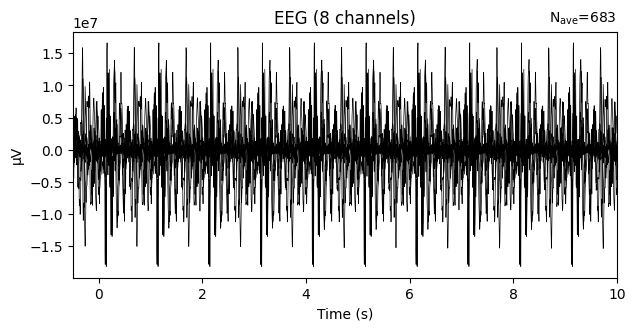

In [59]:
import mne
import numpy as np

tmin = -0.5
tmax = 10
event_duration = 1.0  # Duration of each event segment in seconds
event_overlap = 0.0  # Overlap between consecutive event segments in seconds

# Read the FIF file and create a raw object
raw = mne.io.read_raw_fif('filtered_prediction_test.fif')

# Define the picks (channels) you want to use for prediction
picks = ch_names

# Create artificial events
events = mne.make_fixed_length_events(raw, duration=event_duration, overlap=event_overlap)

# Create epochs from the raw data using the artificial events
#epochs = mne.Epochs(raw, events=events, event_id=None, tmin, tmax, proj=True, picks=picks, baseline=(None, 0), preload=True)
epochs = mne.Epochs(raw, events, event_id=None, tmin=tmin, tmax=tmax, proj=True, picks=picks, baseline=(None, 0), preload=True)
# Print the epochs information
print(epochs)

# Average the epochs to create an evoked response
evoked = epochs.average()

# Plot the evoked response
evoked.plot(time_unit='s')
plt.show()


In [60]:
X_new = epochs.get_data()

# Get the target labels `y` from the event IDs in the epochs
y = epochs.events[:, -1]

# Print the shapes of `X` and `y`
print("Shape of X_new:", X_new.shape)
print("Shape of y:", y.shape)

Shape of X_new: (683, 8, 2626)
Shape of y: (683,)


In [61]:
import torch
import numpy as np

# Assuming you have new data stored in a variable `X_new`
X_new_reshaped = np.transpose(X_new, (0, 2, 1))
X_new_reshaped = np.reshape(X_new_reshaped, (X_new_reshaped.shape[0], X_new_reshaped.shape[1], -1))

# Convert the new data to a PyTorch tensor
X_new_tensor = torch.tensor(X_new_reshaped, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    predictions = model(X_new_tensor)

# Get the predicted movement labels
predicted_labels = torch.argmax(predictions, dim=1)

# Map the predicted labels to the corresponding movement names
movement_labels = ['2', '1']
predicted_movements = [movement_labels[label % len(movement_labels)] for label in predicted_labels]

# Create a text file to store the predicted movements
output_file = "predicted_movements.txt"

# Write the predicted movements to the text file
with open(output_file, 'w') as f:
    for movement in predicted_movements:
        f.write(movement + ",")

print("Predicted movements saved to", output_file)
print(predicted_movements)


Predicted movements saved to predicted_movements.txt
['2', '2', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '2', '1', '1', '2', '1', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '1', '1', '2', '1', '1', '

In [29]:
# import numpy as np

# # Assuming you have new data stored in a variable `X_new`
# X_new_reshaped = np.transpose(X_new, (0, 2, 1))
# X_new_reshaped = np.reshape(X_new_reshaped, (X_new_reshaped.shape[0], X_new_reshaped.shape[1], -1))

# # Make predictions
# predictions = model.predict(X_new_reshaped)

# # Get the predicted movement labels
# predicted_labels = np.argmax(predictions, axis=1)

# # Map the predicted labels to the corresponding movement names
# movement_labels = ['left', 'right', 'forward', 'back']
# predicted_movements = [movement_labels[label % len(movement_labels)] for label in predicted_labels]

# # Create a text file to store the predicted movements
# output_file = "predicted_movements.txt"

# # Write the predicted movements to the text file
# with open(output_file, 'w') as f:
#     for movement in predicted_movements:
#         f.write(movement + ",")

# print("Predicted movements saved to", output_file)
# print(predicted_movements)

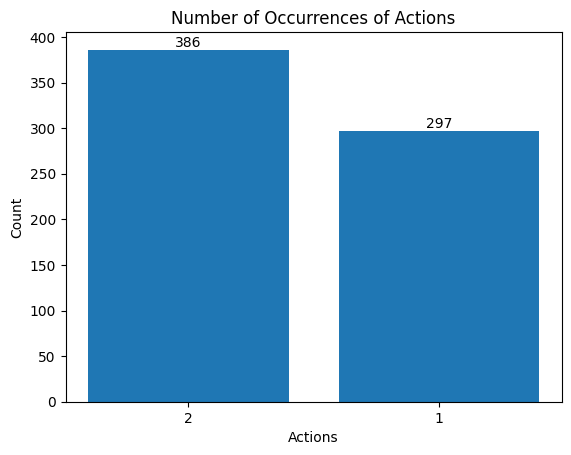

In [62]:
from collections import Counter

# Count the occurrences of each action
action_counts = Counter(predicted_movements)

# Extract the action labels and their respective counts
actions = list(action_counts.keys())
counts = list(action_counts.values())

# Plot the bar chart
plt.bar(actions, counts)
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Number of Occurrences of Actions')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [63]:
correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)
total_samples = len(true_labels)
accuracy = correct_predictions / total_samples

accuracy_percentage = accuracy * 100

# Print accuracy to console
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Specify the filename where you want to save the accuracy
accuracy_file = "accuracy.txt"

# Append accuracy to the existing file
with open(accuracy_file, 'a') as f:
    f.write(f"Accuracy: {accuracy_percentage:.2f}%\n")

print(f"Accuracy appended to {accuracy_file}")


Accuracy: 29.17%
Accuracy appended to accuracy.txt


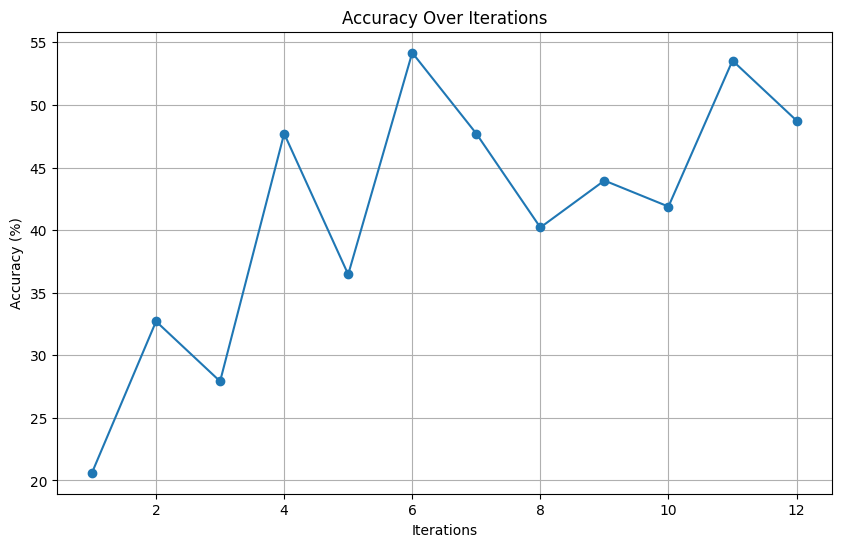

In [57]:
import matplotlib.pyplot as plt

# Read the accuracy data from the file
accuracy_file = "accuracy.txt"
accuracy_values = []

with open(accuracy_file, 'r') as f:
    for line in f:
        if line.startswith("Accuracy:"):
            accuracy_str = line.strip().split(":")[1].strip()
            # Remove the percentage symbol and convert to float
            accuracy_values.append(float(accuracy_str.rstrip('%')))

# Create a list of iteration numbers (assuming each accuracy entry corresponds to an iteration)
iterations = list(range(1, len(accuracy_values) + 1))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracy_values, marker='o', linestyle='-')
plt.title("Accuracy Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy (%)")
plt.grid(True)

# Show or save the plot
plt.show()
